<a href="https://colab.research.google.com/github/cris9005/MSDS411-2023/blob/main/Assignment_3_411.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Methods should be fully documented by showing the structure of the problem and methods used to address the problem. Prepare the data for input to cluster analysis. Ensure that a common scale is employed for all variables prior to input to cluster analysis. Justify your choice of scale and any data transformations performed.

Select at least two cluster analysis methods to carry out the analysis. Justify your choice of methods. Justify decisions regarding the number of clusters to retain. Select a single clustering solution to present to the management client. Justify your selection. Utilize data visualization (including t-SNE) to guide your analysis and to present results to the client.

#Import Packgaces

In [1]:
# Import Libraries
import datetime
from packaging import version
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib as mpl  # EA
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.neural_network
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import tensorflow.keras.backend as k

from keras import models
from keras import layers

In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from scipy.stats import uniform
from scipy import interp

In [3]:
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer,MinMaxScaler, RobustScaler
from sklearn.preprocessing import StandardScaler


In [4]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

Define a baseline solution. Begin by performing traditional logistic regression on these data, using customer financial and demographic data to predict the class of the customer (good or bad). This will be a baseline against which we can compare the performance of an autoencoder-based solution. Utilize internal cross-validation or a training-and-test split to provide a trustworthy baseline measure of classification accuracy. It is recommended that a precision-recall-based method be employed. Precision is the proportion of applicants identified as bad were actually bad. Recall is the proportion of bad applicants we identify as bad. We want high values of precision and recall. Good-versus-bad decision criteria should also be guided by the costs of incorrect applicant classification. [For the logic behind the setting of an optimal cutoff for predicting bad credit, see Zweig and Campbell (1993) and Gallop et al. (2003).]  



In [5]:
pip install liac-arff

  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=3bd35c74e76f170a9e503b375f69d3cd3027400f4d6d532087fd2fd37fe23245
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built liac-arff


In [6]:
# optimal cutoff for predicting bad credit set as
# (cost of false negative/cost of false positive) times
# (prevalence of positive/prevalence of negative)

#CUTOFF CLASSIFICATION AND COST MATRIX----
# (1/5)*(.3/.7) = 0.086
#CUTOFF = 0.086 #Cutoff Classification
#COSTMATRIX = matrix(c(0,5,1,0), nrow = 2, ncol = 2, byrow = TRUE) #Cost Matrix
from scipy.io import arff
#CREDIT ARFF DATASET----
credit = arff.loadarff(r"/content/dataset_31_credit-g.arff")



In [7]:
creditdf = pd.DataFrame(credit[0])
creditdf.head()


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,b'<0',6.0,b'critical/other existing credit',b'radio/tv',1169.0,b'no known savings',b'>=7',4.0,b'male single',b'none',...,b'real estate',67.0,b'none',b'own',2.0,b'skilled',1.0,b'yes',b'yes',b'good'
1,b'0<=X<200',48.0,b'existing paid',b'radio/tv',5951.0,b'<100',b'1<=X<4',2.0,b'female div/dep/mar',b'none',...,b'real estate',22.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',b'bad'
2,b'no checking',12.0,b'critical/other existing credit',b'education',2096.0,b'<100',b'4<=X<7',2.0,b'male single',b'none',...,b'real estate',49.0,b'none',b'own',1.0,b'unskilled resident',2.0,b'none',b'yes',b'good'
3,b'<0',42.0,b'existing paid',b'furniture/equipment',7882.0,b'<100',b'4<=X<7',2.0,b'male single',b'guarantor',...,b'life insurance',45.0,b'none',b'for free',1.0,b'skilled',2.0,b'none',b'yes',b'good'
4,b'<0',24.0,b'delayed previously',b'new car',4870.0,b'<100',b'1<=X<4',3.0,b'male single',b'none',...,b'no known property',53.0,b'none',b'for free',2.0,b'skilled',2.0,b'none',b'yes',b'bad'


In [8]:
catCols = [col for col in creditdf.columns if creditdf[col].dtype=="O"]
catCols[:5]

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment']

In [9]:
creditdf[catCols]=creditdf[catCols].apply(lambda x: x.str.decode('utf8'))
creditdf.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [10]:
creditdf.to_csv('./creditdf.csv',index=False)

#DATA PREPROCESSING and EDA

In [11]:
creditdf['personal_status'].unique() #['<0', '0<=X<200', 'no checking', '>=200'], dtype=object)

array(['male single', 'female div/dep/mar', 'male div/sep',
       'male mar/wid'], dtype=object)

In [12]:
creditdf['purpose'].unique()

array(['radio/tv', 'education', 'furniture/equipment', 'new car',
       'used car', 'business', 'domestic appliance', 'repairs', 'other',
       'retraining'], dtype=object)

In [13]:
def personal_status1(series):
    if series == "male div/sep":
        return 1
    elif series == "female div/dep/mar":
        return 2
    elif series == "male single":
        return 3
    elif series == "male mar/wid":
        return 4

creditdf['personal_status'] = creditdf['personal_status'].apply(personal_status1)


In [14]:
creditdf['personal_status']

0      3
1      2
2      3
3      3
4      3
      ..
995    2
996    1
997    3
998    3
999    3
Name: personal_status, Length: 1000, dtype: int64

In [15]:
def purpose1(series):
    if series == "new car":
        return "new car"
    elif series == "used car":
        return "used car"
    elif series == "furniture/equipment":
        return "furniture/equipment"
    elif series == "radio/tv":
        return "radio/tv"
    elif series == "education":
        return "education"
    elif series == "business":
        return "business"
    elif series == "other":
        return "other"
    elif series == "retraining":
        return "education"
    else:
        return "other"

In [16]:
creditdf['purpose'] = creditdf['purpose'].apply(purpose1)


In [ ]:
creditdf['purpose'].unique()

array(['radio/tv', 'education', 'furniture/equipment', 'new car',
       'used car', 'business', 'other'], dtype=object)

In [ ]:
creditdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   int64  
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [ ]:
creditdf.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_commitment,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
personal_status,1000.0,2.682,0.708080,1.0,2.0,3.0,3.00,4.0
residence_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_credits,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
num_dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


#Visualizing Numerical and Categorcal Variables

Below are initial visualisations for gaining simple insights to the data for:

Gender Distribution
Risk Assessment Distribution
Credit Amount vs Gender
Numerical Distributions

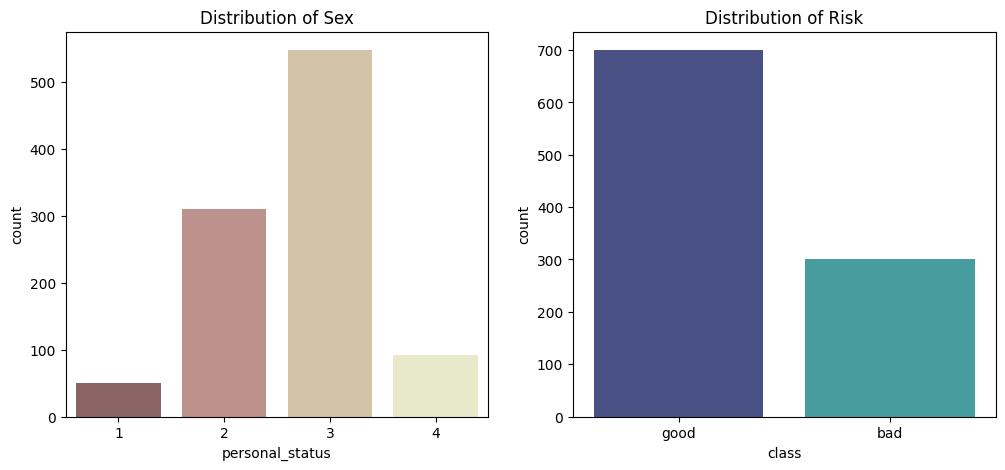

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot for categorical variable 'Sex'
sns.countplot(x='personal_status', data=creditdf, palette="pink", ax=axes[0])
axes[0].set_title('Distribution of Sex')

# Plot for categorical variable 'Risk'
sns.countplot(x='class', data=creditdf, palette="mako", ax=axes[1])
axes[1].set_title('Distribution of Risk')

plt.show()

Analysis:
- The major of the individuals are single males.

- The risk distribution has a high chance of being good.

*italicized text*
"male div/sep": 1
"female div/dep/mar": 2
"male single": 3
"male mar/wid": 4

<Axes: xlabel='age', ylabel='Count'>

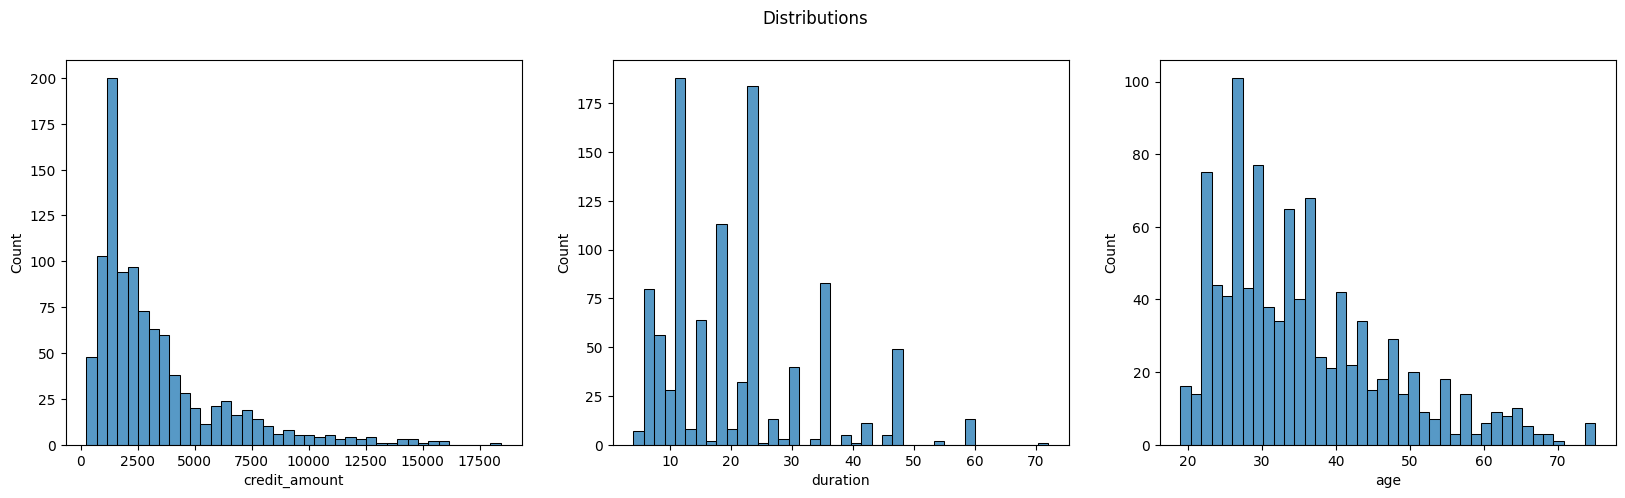

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
plt.suptitle('Distributions')

sns.histplot(creditdf['credit_amount'], bins=40, ax=ax[0])
sns.histplot(creditdf['duration'], bins=40, ax=ax[1])
sns.histplot(creditdf['age'], bins=40, ax=ax[2])

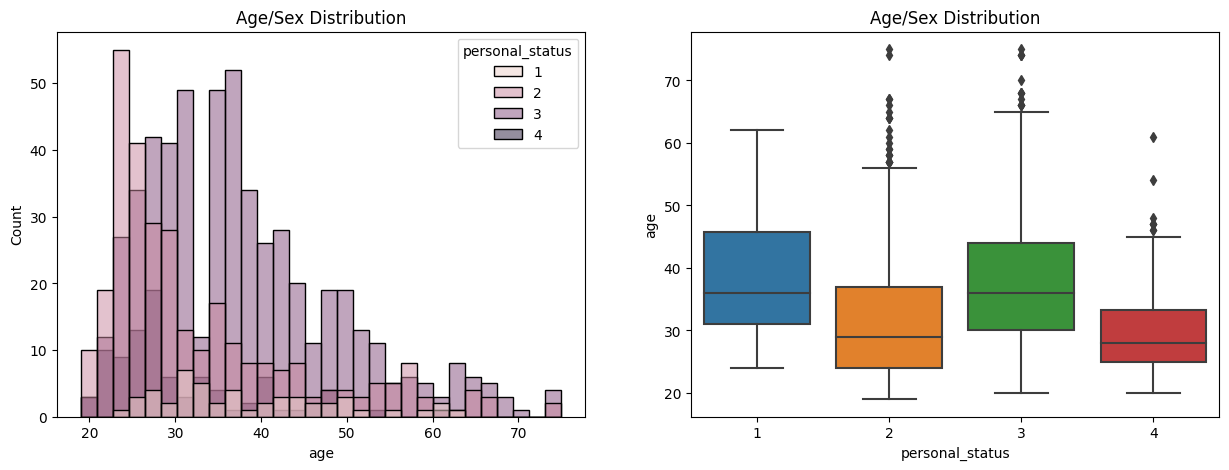

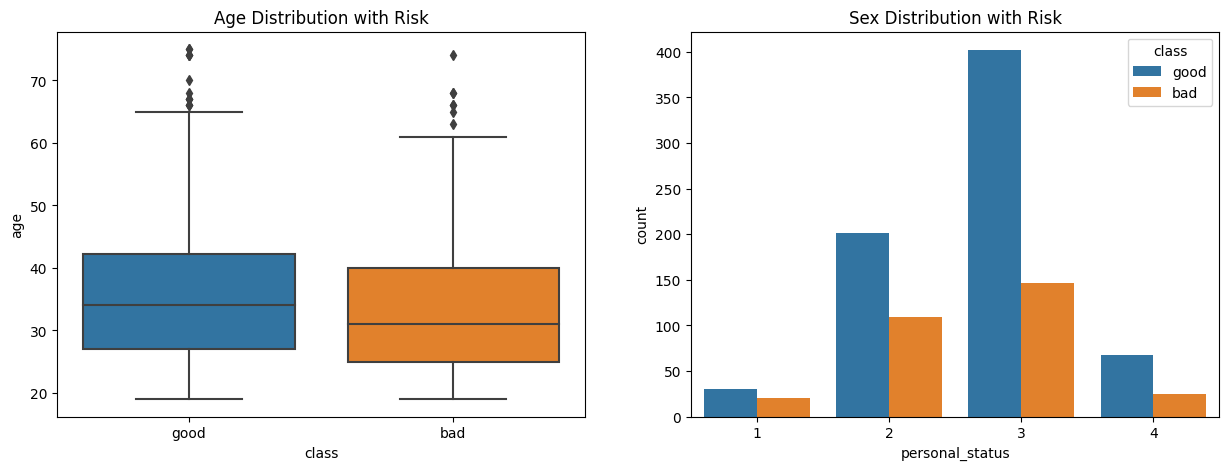

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(creditdf, x='age', bins=30, hue="personal_status", ax=ax[0]).set_title("Age/Sex Distribution");
sns.boxplot(data=creditdf, x="personal_status", y="age", ax=ax[1]).set_title("Age/Sex Distribution");

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data=creditdf, x='class', y='age', ax=ax[0]).set_title("Age Distribution with Risk");
sns.countplot(data=creditdf, x="personal_status", hue="class", ax=ax[1]).set_title("Sex Distribution with Risk");

Analysis:
- Age does not affect the risk rating much.
- Males take more count of credit from Bank.
- Males have lower percentage of bad rating than woman.

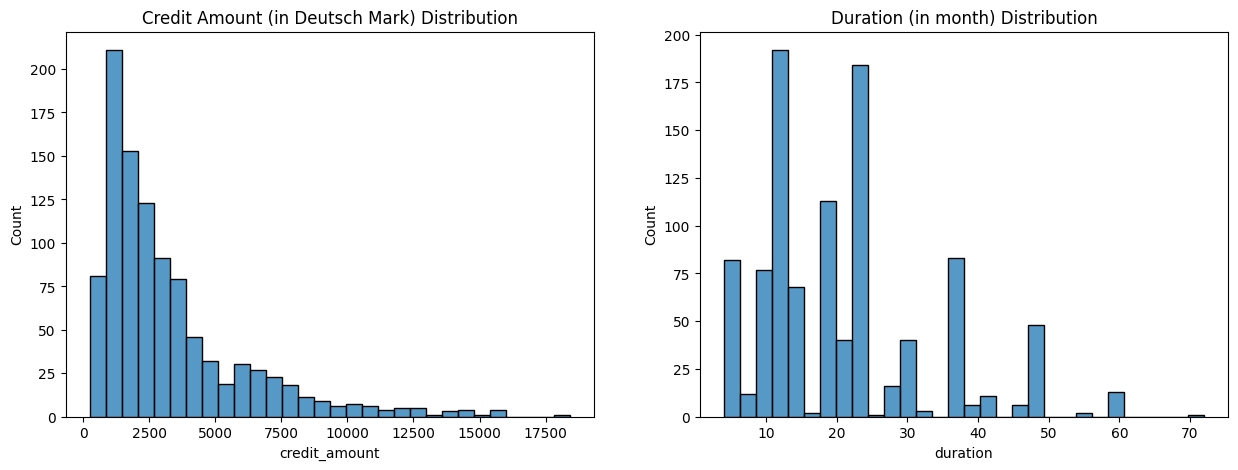

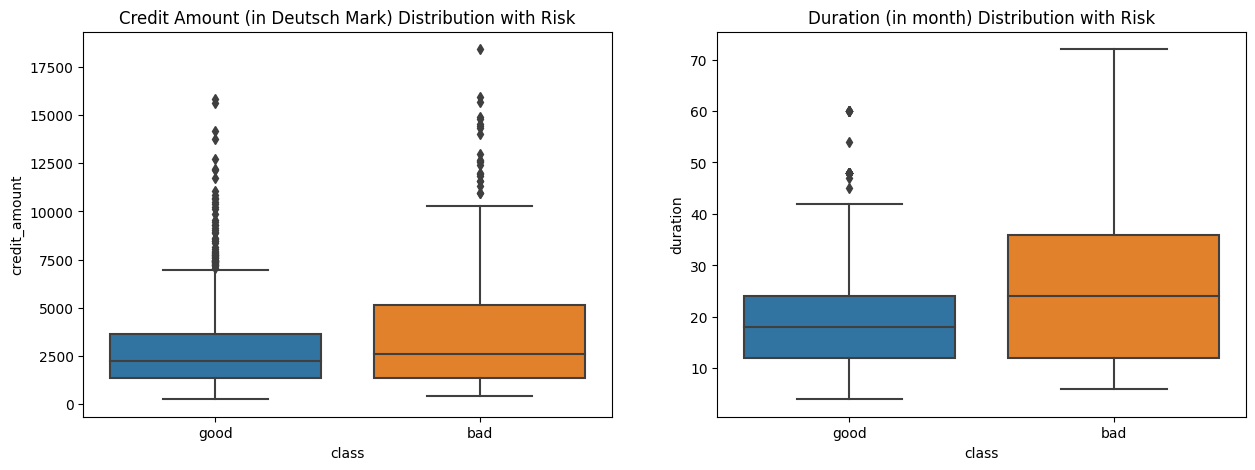

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(creditdf, x='credit_amount', bins=30, ax=ax[0]).set_title("Credit Amount (in Deutsch Mark) Distribution");
sns.histplot(creditdf, x='duration', bins=30, ax=ax[1]).set_title("Duration (in month) Distribution");

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data=creditdf, x='class', y='credit_amount', ax=ax[0]).set_title("Credit Amount (in Deutsch Mark) Distribution with Risk");
sns.boxplot(data=creditdf, x='class', y='duration', ax=ax[1]).set_title("Duration (in month) Distribution with Risk");

Analysis: The higher credit amount and longer duration means higher risk to the bank.

In [ ]:
creditdf['job'].unique()

array(['skilled', 'unskilled resident', 'high qualif/self emp/mgmt',
       'unemp/unskilled non res'], dtype=object)

In [ ]:
def job1(series):
    if series == "skilled":
        return 1
    elif series == "unskilled resident":
        return 2
    elif series == "high qualif/self emp/mgmt":
        return 3
    elif series == "unemp/unskilled non res":
        return 4

creditdf['job'] = creditdf['job'].apply(job1)

In [ ]:
creditdf['job'].unique()

array([1, 2, 3, 4])

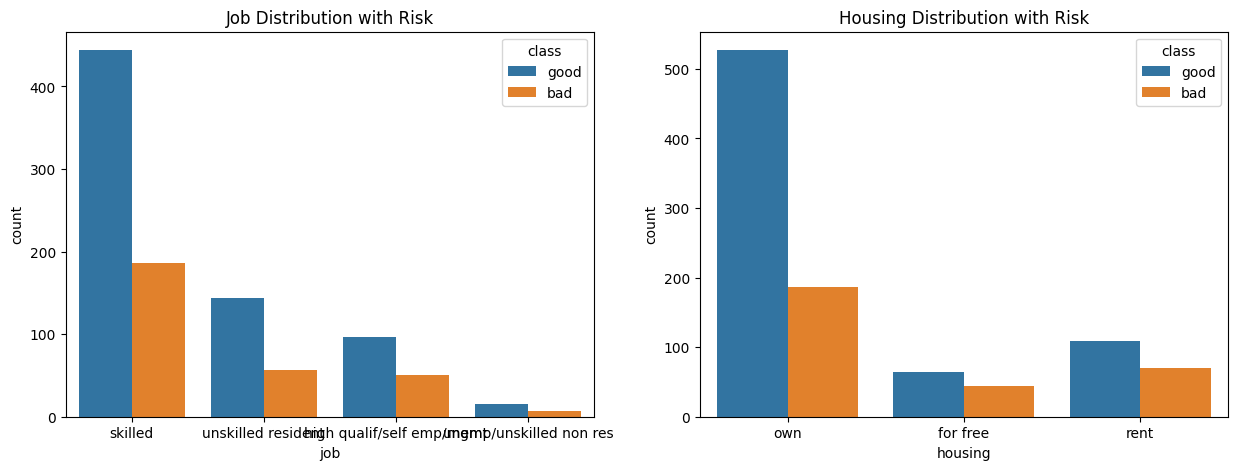

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=creditdf, x="job", hue="class", ax=ax[0]).set_title("Job Distribution with Risk");
sns.countplot(data=creditdf, x="housing", hue="class", ax=ax[1]).set_title("Housing Distribution with Risk");

Analysis:

1 - skilled,
2 - unskilled and resident,
3 - highly skilled
4 - unskilled and non-resident

- Most of people in records have job skill level 1, but the job skill level does not affect the risk rating much.
- People who own a house means low risk and good rating to the bank.

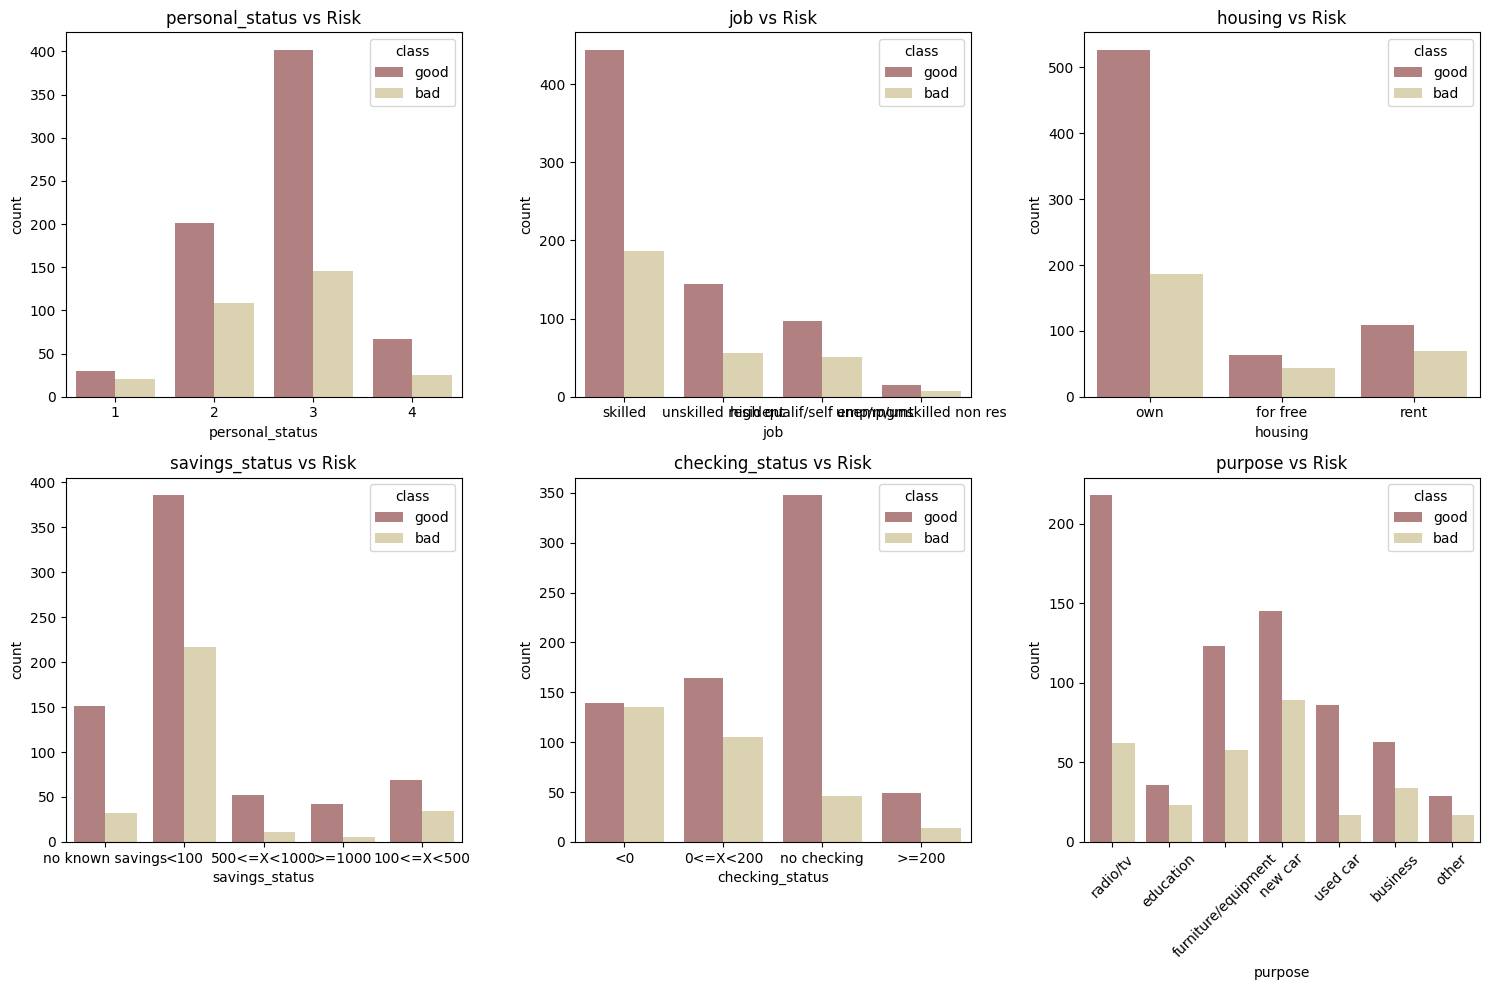

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axes with a grid layout
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
plt.xticks(rotation=45)

# Categorical Variables
categorical_vars = ['personal_status', 'job', 'housing', 'savings_status', 'checking_status', 'purpose']

# Plot each categorical variable with respect to 'Risk' in the grid layout
for i, var in enumerate(categorical_vars):
    row = i // 3  # Calculate the row index
    col = i % 3   # Calculate the column index

    sns.countplot(x=var, hue="class", data=creditdf, ax=axes[row, col], palette = "pink")
    axes[row, col].set_title(f'{var} vs Risk')

# Adjust the spacing between subplots
plt.tight_layout()
plt.xticks(rotation=45)

# Display the plots
plt.show()

Analysis:
(since 0 means unknown, only discuss quality level 1 to 4):

- The person with more saving means less risk to the bank, but most people in the records have little saving (not rich!)
- About half of people who have little checking account are considered as bad rating in risk.
About 20% of people who have moderate checking account are considered as bad rating in risk.
- Purpose seems to have the largest gaps within good and bad risk. Where new cars having the biggest risk for banks.

#Analysis of Correlation

<ipython-input-53-0706b9af5600>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = creditdf.corr()
<ipython-input-53-0706b9af5600>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(correlation_matrix, linewidths=.1, annot=True, cmap="YlGnBu",mask=np.triu(np.ones_like(correlation_matrix, dtype=np.bool)))\


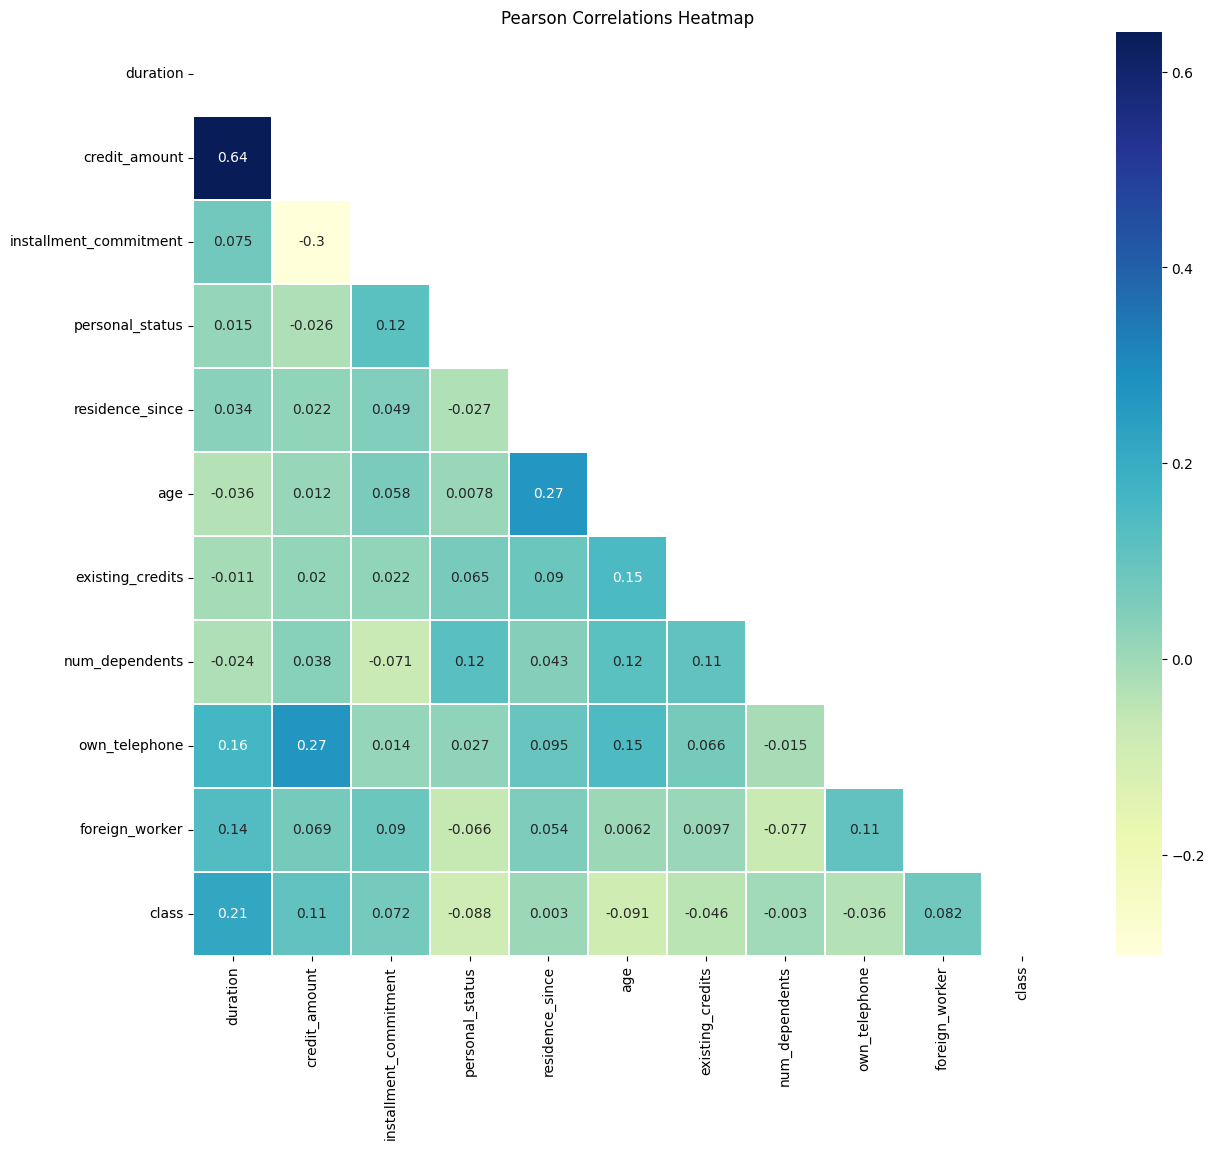

In [ ]:
# Heatmap to show correlations
correlation_matrix = creditdf.corr()
plt.figure(figsize=(14,12))

sns.heatmap(correlation_matrix, linewidths=.1, annot=True, cmap="YlGnBu",mask=np.triu(np.ones_like(correlation_matrix, dtype=np.bool)))\
    .set_title("Pearson Correlations Heatmap");

<ipython-input-102-0706b9af5600>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = creditdf.corr()
<ipython-input-102-0706b9af5600>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(correlation_matrix, linewidths=.1, annot=True, cmap="YlGnBu",mask=np.triu(np.ones_like(correlation_matrix, dtype=np.bool)))\


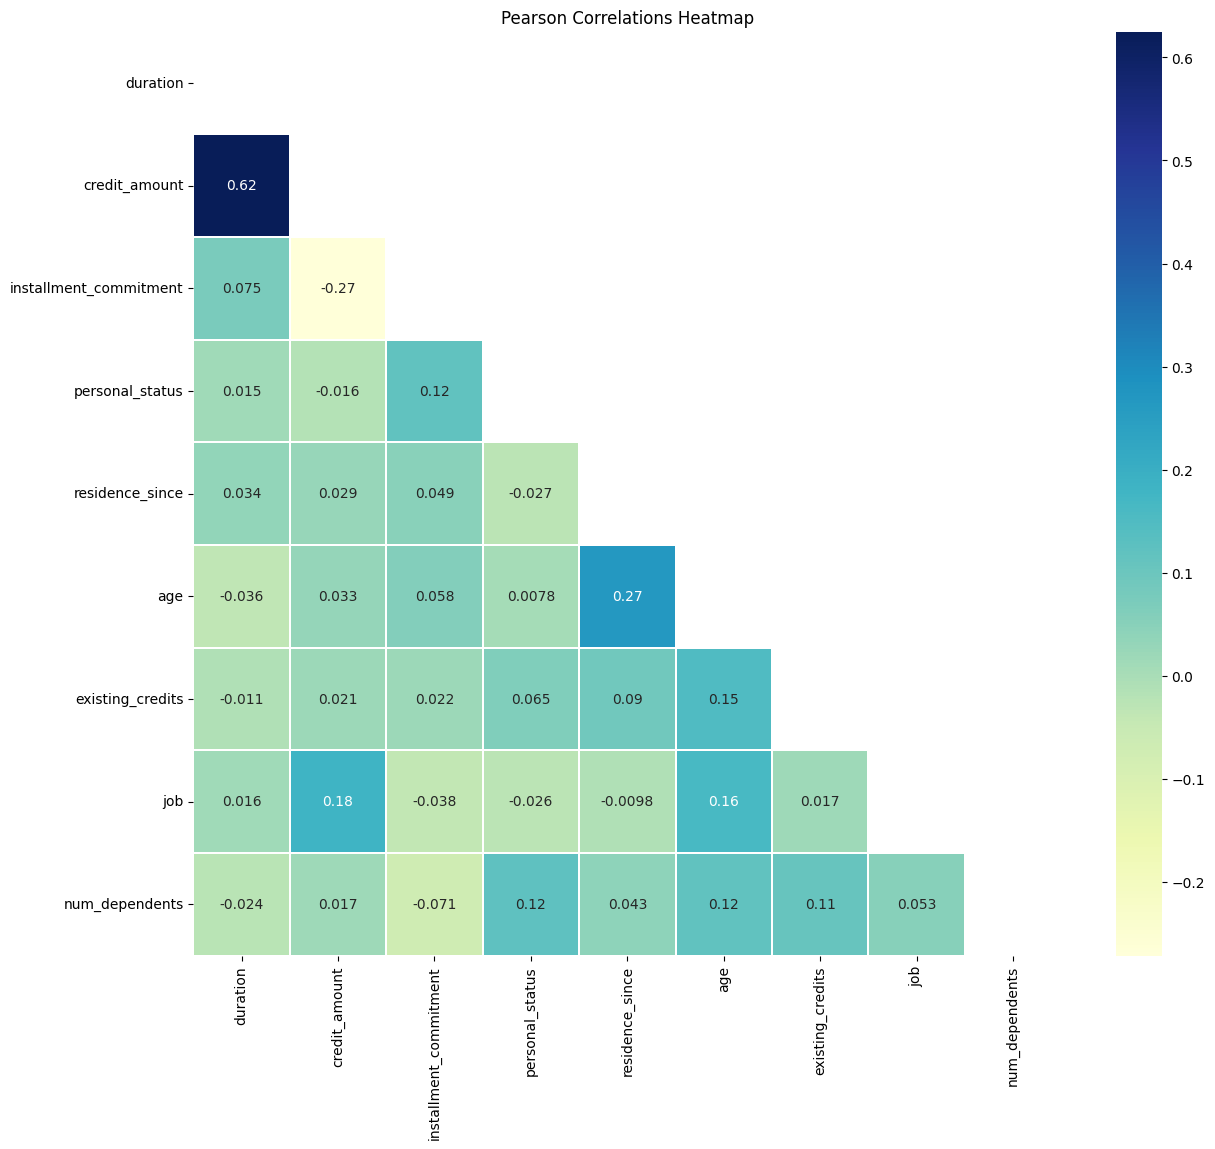

In [ ]:
# Heatmap to show correlations
correlation_matrix = creditdf.corr()
plt.figure(figsize=(14,12))

sns.heatmap(correlation_matrix, linewidths=.1, annot=True, cmap="YlGnBu",mask=np.triu(np.ones_like(correlation_matrix, dtype=np.bool)))\
    .set_title("Pearson Correlations Heatmap");

Analysis: The Credit Amount is HIGHLY and POSITIVELY related to the Duration.

In [ ]:
creditdf.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_commitment,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
personal_status,1000.0,2.682,0.708080,1.0,2.0,3.0,3.00,4.0
residence_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_credits,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
job,1000.0,1.562,0.821481,1.0,1.0,1.0,2.00,4.0
num_dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [ ]:
date_int = ["purpose", 'personal_status']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(creditdf[date_int[0]], creditdf[date_int[1]]).style.background_gradient(cmap = cm)

personal_status,1,2,3,4
purpose,,,,
business,10,19,59,9
education,1,24,30,4
furniture/equipment,15,74,85,7
new car,10,70,134,20
other,4,14,24,4
radio/tv,7,85,146,42
used car,3,24,70,6


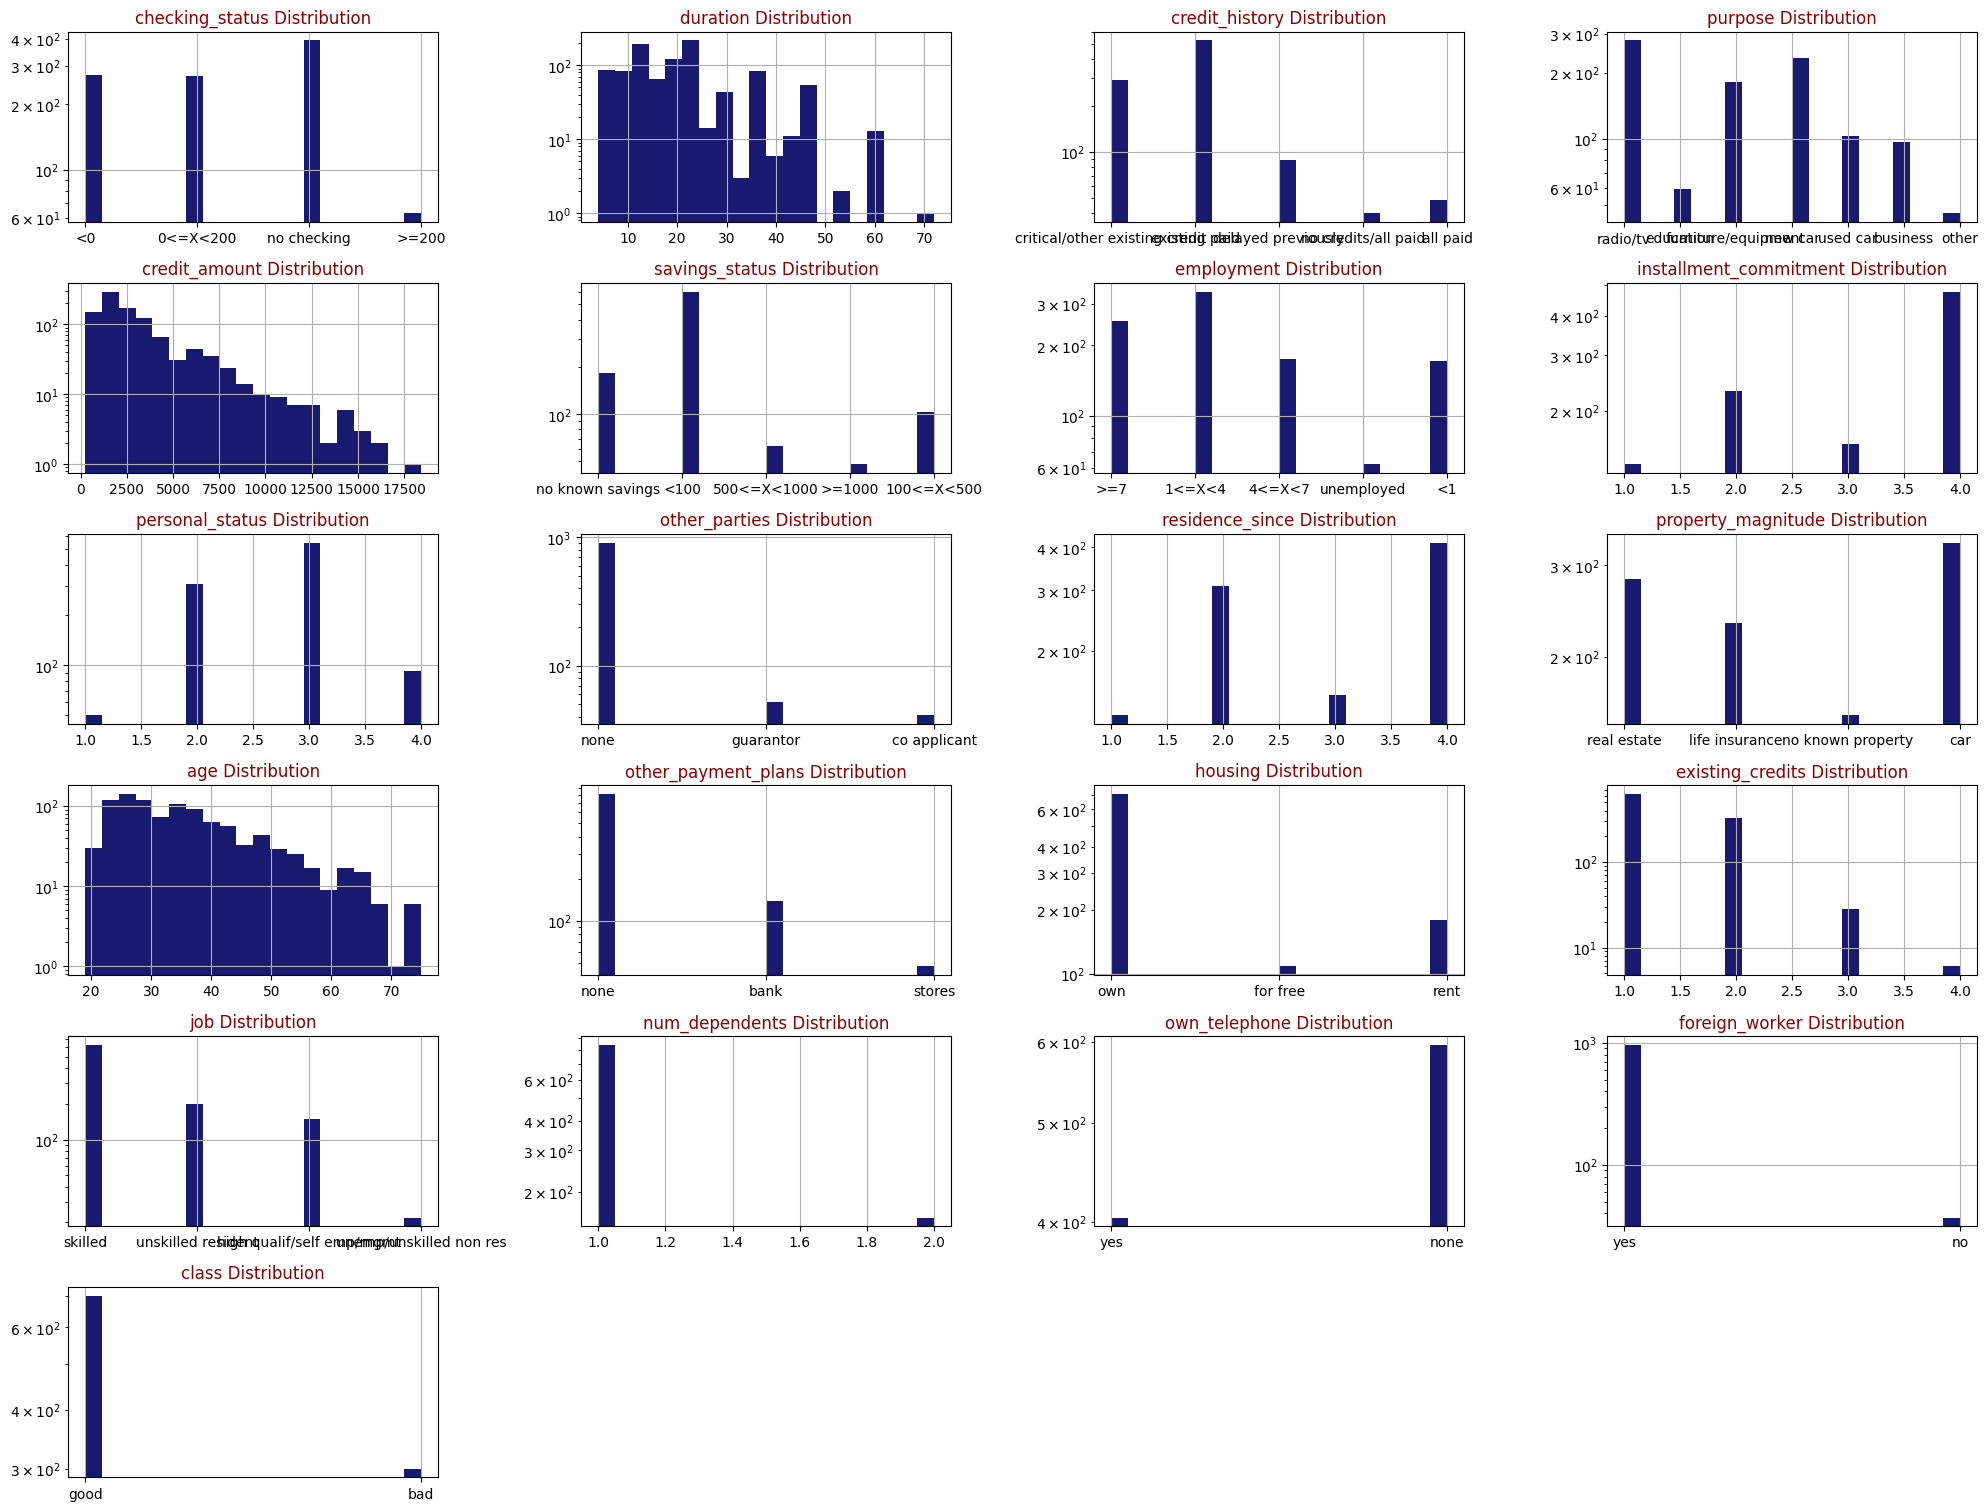

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()
    plt.show()
draw_histograms(creditdf,creditdf.columns,8,4)

#Encoding

In [18]:
categorical_columns = [col for col in creditdf.columns if creditdf[col].dtype == 'object']


In [19]:
categorical_columns

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone',
 'foreign_worker',
 'class']

In [20]:
def class1(series):
    if series == "good":
        return 0
    elif series == "bad":
        return 1

creditdf['class'] = creditdf['class'].apply(class1)

In [21]:
creditdf.groupby(['employment', 'job']).count() #'critical/other existing credit', 'existing paid',
       #'delayed previously', 'no credits/all paid', 'all paid'],


checking_status  duration  \
employment job                                                    
1<=X<4     high qualif/self emp/mgmt               28        28   
           skilled                                230       230   
           unemp/unskilled non res                  1         1   
           unskilled resident                      80        80   
4<=X<7     high qualif/self emp/mgmt               21        21   
           skilled                                119       119   
           unskilled resident                      34        34   
<1         high qualif/self emp/mgmt               16        16   
           skilled                                107       107   
           unemp/unskilled non res                  5         5   
           unskilled resident                      44        44   
>=7        high qualif/self emp/mgmt               50        50   
           skilled                                162       162   
           unskilled resident                      41        41   
unemployed high qualif/self emp/mgmt               33        33   
           skilled                                 12        12   
           unemp/unskilled non res                 16        16   
           unskilled resident                       1         1   

                                      credit_history  purpose  credit_amount  \
employment job                                                                 
1<=X<4     high qualif/self emp/mgmt              28       28             28   
           skilled                               230      230            230   
           unemp/unskilled non res                 1        1              1   
           unskilled resident                     80       80             80   
4<=X<7     high qualif/self emp/mgmt              21       21             21   
           skilled                               119      119            119   
           unskilled resident                     34       34             34   
<1         high qualif/self emp/mgmt              16       16             16   
           skilled                               107      107            107   
           unemp/unskilled non res                 5        5              5   
           unskilled resident                     44       44             44   
>=7        high qualif/self emp/mgmt              50       50             50   
           skilled                               162      162            162   
           unskilled resident                     41       41             41   
unemployed high qualif/self emp/mgmt              33       33             33   
           skilled                                12       12             12   
           unemp/unskilled non res                16       16             16   
           unskilled resident                      1        1              1   

                                      savings_status  installment_commitment  \
employment job                                                                 
1<=X<4     high qualif/self emp/mgmt              28                      28   
           skilled                               230                     230   
           unemp/unskilled non res                 1                       1   
           unskilled resident                     80                      80   
4<=X<7     high qualif/self emp/mgmt              21                      21   
           skilled                               119                     119   
           unskilled resident                     34                      34   
<1         high qualif/self emp/mgmt              16                      16   
           skilled                               107                     107   
           unemp/unskilled non res                 5                       5   
           unskilled resident                     44                      44   
>=7        high qualif/self emp/mgmt              50    

In [ ]:
creditdf['own_telephone'].unique()

array([1, 0])

In [22]:
creditdf['own_telephone'] = creditdf['own_telephone'].replace('none',0)
creditdf['own_telephone'] = creditdf['own_telephone'].replace('yes',1)
creditdf['foreign_worker'] = creditdf['foreign_worker'].replace('no',0)
creditdf['foreign_worker'] = creditdf['foreign_worker'].replace('yes',1)

In [23]:
#Transformar variables en dummies
dummies = creditdf.select_dtypes(include='object')
dummies_df = pd.get_dummies(dummies)

# Delete these columns from df
df_org = creditdf.select_dtypes(exclude=['object'])

In [24]:
# Reescalamos las variables entre 0-1 para que sean comparativas
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_org),columns=df_org.columns)

#Merge dummies df with original df
df = pd.concat([df_scaled,dummies_df], axis=1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 54 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   duration                                       1000 non-null   float64
 1   credit_amount                                  1000 non-null   float64
 2   installment_commitment                         1000 non-null   float64
 3   personal_status                                1000 non-null   float64
 4   residence_since                                1000 non-null   float64
 5   age                                            1000 non-null   float64
 6   existing_credits                               1000 non-null   float64
 7   num_dependents                                 1000 non-null   float64
 8   own_telephone                                  1000 non-null   float64
 9   foreign_worker                                 1000 n

In [ ]:
#Ver cuántos good y bad hay de cada clase
df[df['class'] == 1].count()


KeyError: ignored

##Logistic Regression Baseline

In [25]:
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer,MinMaxScaler, RobustScaler
from sklearn.preprocessing import StandardScaler

In [26]:
X = df.drop("class", axis=1)
y = df["class"]


In [27]:
# Training set and Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.feature_selection import RFE

In [28]:
# credit_amount is highly skewed... use log_credit_amount instead
creditdf['credit_amount'] = np.log(creditdf['credit_amount'])

In [29]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.fit_transform(X)

Model Evaluation

In [30]:
from sklearn.model_selection import cross_validate


In [31]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)


In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix



array([[124,  17],
       [ 25,  34]])

In [32]:
from sklearn.metrics import classification_report
target_names = ['Good', 'Bad']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Good       0.83      0.88      0.85       141
         Bad       0.66      0.56      0.61        59

    accuracy                           0.79       200
   macro avg       0.74      0.72      0.73       200
weighted avg       0.78      0.79      0.78       200



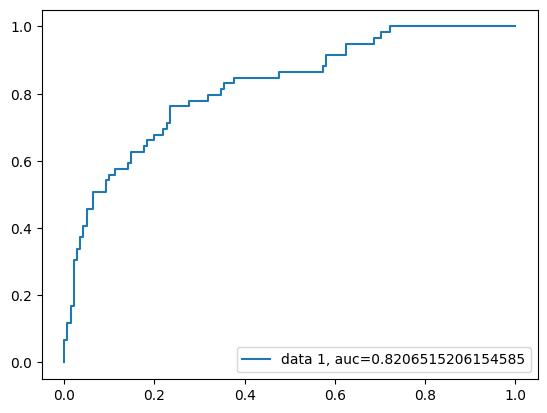

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for the case is 0.88. AUC score 1 represents a perfect classifier, and 0.5 represents a worthless classifier.


Precision in our model is 77%

Recall in our model 93%

Accuracy is our model 74%

f1_score is our model 83%

In [ ]:
from sklearn.metrics import roc_auc_score


In [33]:
X_train_0 = X_train[y_train == 0]
X_train_AE = X_train_0.sample(frac=0.5, random_state=42)
X_train_AE_scaled = StandardScaler().fit_transform(X_train_AE)

X_train_est = X_train.drop(X_train_AE.index)
y_train_est = y_train.drop(X_train_AE.index)

latent_scaler = StandardScaler()
X_train_est_scaled = latent_scaler.fit_transform(X_train_est)
X_test_est_scaled = latent_scaler.transform(X_test)


In [57]:
def create_autoencoder(input_dim=30, latent_dim=50):
    """ Creates an Autoencoder Model where input_dim is the number of features.
    The encoding part uses L1-regularization as sparsity constraint """

    input_layer = Input(shape=(input_dim,), name='Input')
    encoded = Dense(100, activation='relu', activity_regularizer=regularizers.l1(10e-5), name='Encoding')(input_layer)
    latent =  Dense(latent_dim, activation='relu', name='Latent')(encoded)
    decoded = Dense(100, activation='relu', name='Decoding')(latent)
    output_layer = Dense(input_dim, activation='linear', name='Output')(decoded)

    autoencoder = Model(input_layer, output_layer)
    return autoencoder

In [58]:
np.random.seed(4)

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

In [59]:
np.random.seed(42)
tf.random.set_seed(42)

encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])
autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1.5))

In [60]:
# Configure the learning process, by compiling the model
autoencoder.compile(optimizer='adam',
                    metrics=['accuracy'],
                    loss='mean_squared_error')

In [61]:
# History.history attribute is a record of training loss values
# and metrics values at successive epochs.
history = autoencoder.fit(x=X_train, y=X_train,
                          epochs=20,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(X_test, X_test),
                          verbose=1, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)])

Epoch 1/20
1/1 [==============================] - ETA: 0s - loss: 0.2704 - accuracy: 0.1667

ValueError: ignored

In [62]:
history = autoencoder.fit(X_train, X_train, epochs=20)

Epoch 1/20
2/2 [==============================] - 0s 11ms/step - loss: 0.2684 - accuracy: 0.1667
Epoch 2/20
2/2 [==============================] - 0s 8ms/step - loss: 0.2655 - accuracy: 0.1833
Epoch 3/20
2/2 [==============================] - 0s 9ms/step - loss: 0.2626 - accuracy: 0.1833
Epoch 4/20
2/2 [==============================] - 0s 8ms/step - loss: 0.2599 - accuracy: 0.1833
Epoch 5/20
2/2 [==============================] - 0s 8ms/step - loss: 0.2572 - accuracy: 0.1833
Epoch 6/20
2/2 [==============================] - 0s 9ms/step - loss: 0.2544 - accuracy: 0.2000
Epoch 7/20
2/2 [==============================] - 0s 8ms/step - loss: 0.2516 - accuracy: 0.2167
Epoch 8/20
2/2 [==============================] - 0s 10ms/step - loss: 0.2490 - accuracy: 0.2333
Epoch 9/20
2/2 [==============================] - 0s 10ms/step - loss: 0.2464 - accuracy: 0.2333
Epoch 10/20
2/2 [==============================] - 0s 8ms/step - loss: 0.2437 - accuracy: 0.2333
Epoch 11/20
2/2 [===================

In [63]:
codings = encoder.predict(X_train)


2/2 [==============================] - 0s 6ms/step


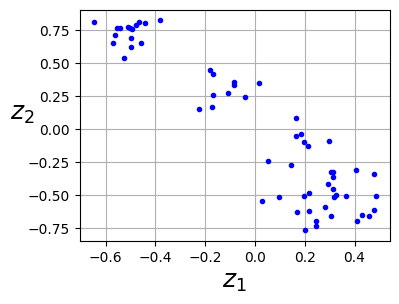

In [64]:
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

In [65]:
reconstructions = autoencoder.predict(X_train)
train_loss = tf.keras.losses.mae(reconstructions, X_train)
np.mean(train_loss)

2/2 [==============================] - 0s 6ms/step


0.4012061730033682

In [ ]:
threshold = np.mean(train_loss) + np.std(train_loss)

In [ ]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

In [ ]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, preds)))
  print("Precision = {}".format(precision_score(labels, preds)))
  print("Recall = {}".format(recall_score(labels, preds)))


In [67]:
from keras.callbacks import ModelCheckpoint, TensorBoard


In [68]:
nb_epoch = 100
batch_size = 32

autoencoder.compile(optimizer='adam',
                    loss='mean_squared_error',
                    )

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_split=0.3,
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Epoch 1/100
2/2 [==============================] - 2s 297ms/step - loss: 0.2322 - val_loss: 0.1807
Epoch 2/100
2/2 [==============================] - 0s 111ms/step - loss: 0.2296 - val_loss: 0.1789
Epoch 3/100
1/2 [==============>...............] - ETA: 0s - loss: 0.2370

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 112ms/step - loss: 0.2272 - val_loss: 0.1772
Epoch 4/100
2/2 [==============================] - 0s 99ms/step - loss: 0.2248 - val_loss: 0.1754
Epoch 5/100
2/2 [==============================] - 0s 108ms/step - loss: 0.2223 - val_loss: 0.1736
Epoch 6/100
2/2 [==============================] - 0s 78ms/step - loss: 0.2199 - val_loss: 0.1717
Epoch 7/100
2/2 [==============================] - 0s 108ms/step - loss: 0.2177 - val_loss: 0.1699
Epoch 8/100
2/2 [==============================] - 0s 108ms/step - loss: 0.2154 - val_loss: 0.1682
Epoch 9/100
2/2 [==============================] - 0s 103ms/step - loss: 0.2131 - val_loss: 0.1664
Epoch 10/100
2/2 [==============================] - 0s 97ms/step - loss: 0.2109 - val_loss: 0.1647
Epoch 11/100
2/2 [==============================] - 0s 86ms/step - loss: 0.2086 - val_loss: 0.1630
Epoch 12/100
2/2 [==============================] - 0s 124ms/step - loss: 0.2065 - val_loss: 0.1614
Epoch 13/100
2/2 [=====

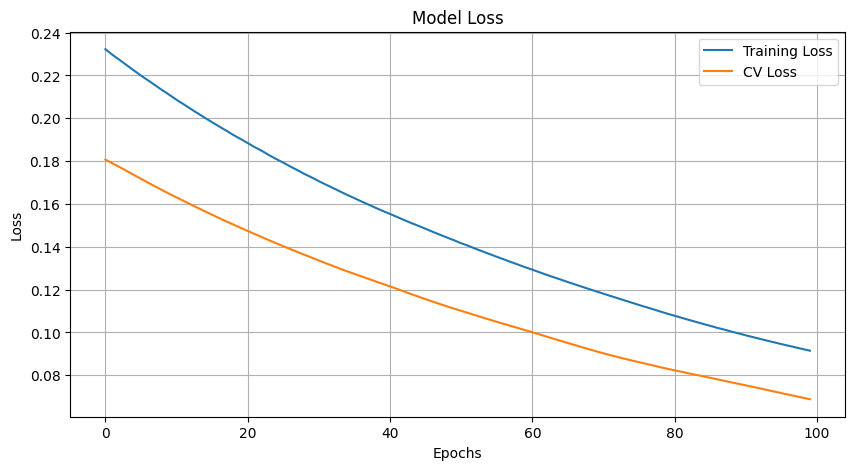

In [69]:
plt.figure(figsize = (10,5))
plt.plot(history['loss'], label = 'Training Loss')
plt.plot(history['val_loss'], label = 'CV Loss')
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

In [72]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

ValueError: ignored

Very interesting. Almost all models shows a low value to recall.

We can observe that our best results was with CART, NB and XGBoost.
I will implement some models and try to do a simple Tunning on them